## FRANCE DASHBOARD USING PUBLIC STATISTICS

# Environnement setup

Import needed modules

In [75]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

Add functions, load data and create needed dictionnaries

In [89]:


# Add president mandates to graphs
def add_pres():
    # President mandates
    president = {
    'Jacques Chirac': [1995, 2007],
    'Nicolas Sarkozy': [2007, 2012],
    'François Hollande': [2012, 2017],
    'Emmanuel Macron': [2017, 2022],}
    # Add vertical lines for each presidential term
    for president, years in president.items():
        plt.axvline(x=years[0], color='k', linestyle='--', linewidth=1)
        plt.text(
            years[0] + 0.5, 
            plt.ylim()[1] - 5, 
            president, 
            rotation=90, 
            verticalalignment='top')

# Read the Excel file into a DataFrame
df = pd.read_excel("data/T_3301.xlsx", sheet_name="Data")
GDP = pd.read_excel("data/FRA_GDP.xlsx")

# Remove all starting whitespace
df.rename(columns=lambda x: x.strip(), inplace=True)

# For plots
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200
fontP = FontProperties()
fontP.set_size('xx-small')

# Focus on each sector
Sector defined by: https://juste-repartition.fr/wp-content/uploads/2022/11/Estimation-depenses-publiques-France-2022.xlsx

In [90]:
# Create a new dataframe
df_sector = df.copy()
df_sector = df_sector.merge(GDP, on='Annuel')

df_sector.columns = [col[:4] for col in df_sector.columns]

df_sector["Retraites"] = df_sector["10.2"] + df_sector["10.3"]
df_sector["Assurance-maladie-santé"] = df_sector["10.1"] + df_sector["07.1"] + df_sector["07.2"] + df_sector["07.3"] + df_sector["07.4"] + df_sector["07.5"] + df_sector["07.6"]
df_sector["Famille"] = df_sector["10.4"]
df_sector["Chomage"] = df_sector["10.5"]
df_sector["Autres solidarités"] = df_sector["10.6"] + df_sector["10.7"] + df_sector["10.8"] + df_sector["10.9"]
df_sector["Education"] = df_sector["09.1"] + df_sector["09.2"] + df_sector["09.3"] + df_sector["09.4"] + df_sector["09.5"] + df_sector["09.6"] + df_sector["09.7"] + df_sector["09.8"] + df_sector["01.4"]
df_sector["Soutien à l'économie"] = df_sector["01.2"] + df_sector["04.1"] + df_sector["04.2"] + df_sector["04.4"] + df_sector["04.6"] + df_sector["04.7"] + df_sector["04.8"] + df_sector["04.9"]
df_sector["Transports et urbanisme"] = df_sector["04.5"] + df_sector["06.1"] + df_sector["06.2"] + df_sector["06.3"] + df_sector["06.4"] + df_sector["06.5"] + df_sector["06.6"]
df_sector["Services Généraux"] = df_sector["01.1"] + df_sector["01.3"] + df_sector["01.5"] + df_sector["01.6"] + df_sector["01.8"]
df_sector["Environnement et Energie"] = df_sector["04.3"] + df_sector["05.1"] + df_sector["05.2"] + df_sector["05.3"] + df_sector["05.4"] + df_sector["05.5"] + df_sector["05.6"]
df_sector["Culture et sport"] = df_sector["08.1"] + df_sector["08.2"] + df_sector["08.3"] + df_sector["08.4"] + df_sector["08.5"] + df_sector["08.6"]
df_sector["Défense, Sécurité et Justice"] = df_sector["02.1"] + df_sector["02.2"] + df_sector["02.3"] + df_sector["02.4"] + df_sector["02.5"] + df_sector["03.1"] + df_sector["03.6"] + df_sector["03.2"] + df_sector["03.3"] + df_sector["03.4"] + df_sector["03.5"]
df_sector["Charges de la dette"] = df_sector["01.7"]

df_column = [col for col in df_sector.columns if re.match(r'^[A-Z]', col)]
df_sector = df_sector[df_column]

df_sector.iloc[:,2:15,] = df_sector.iloc[:,2:15,].div(df_sector.PIB, axis=0)*100

### Evolution of the expenses between 1995 and 2022, as a % of the GDP

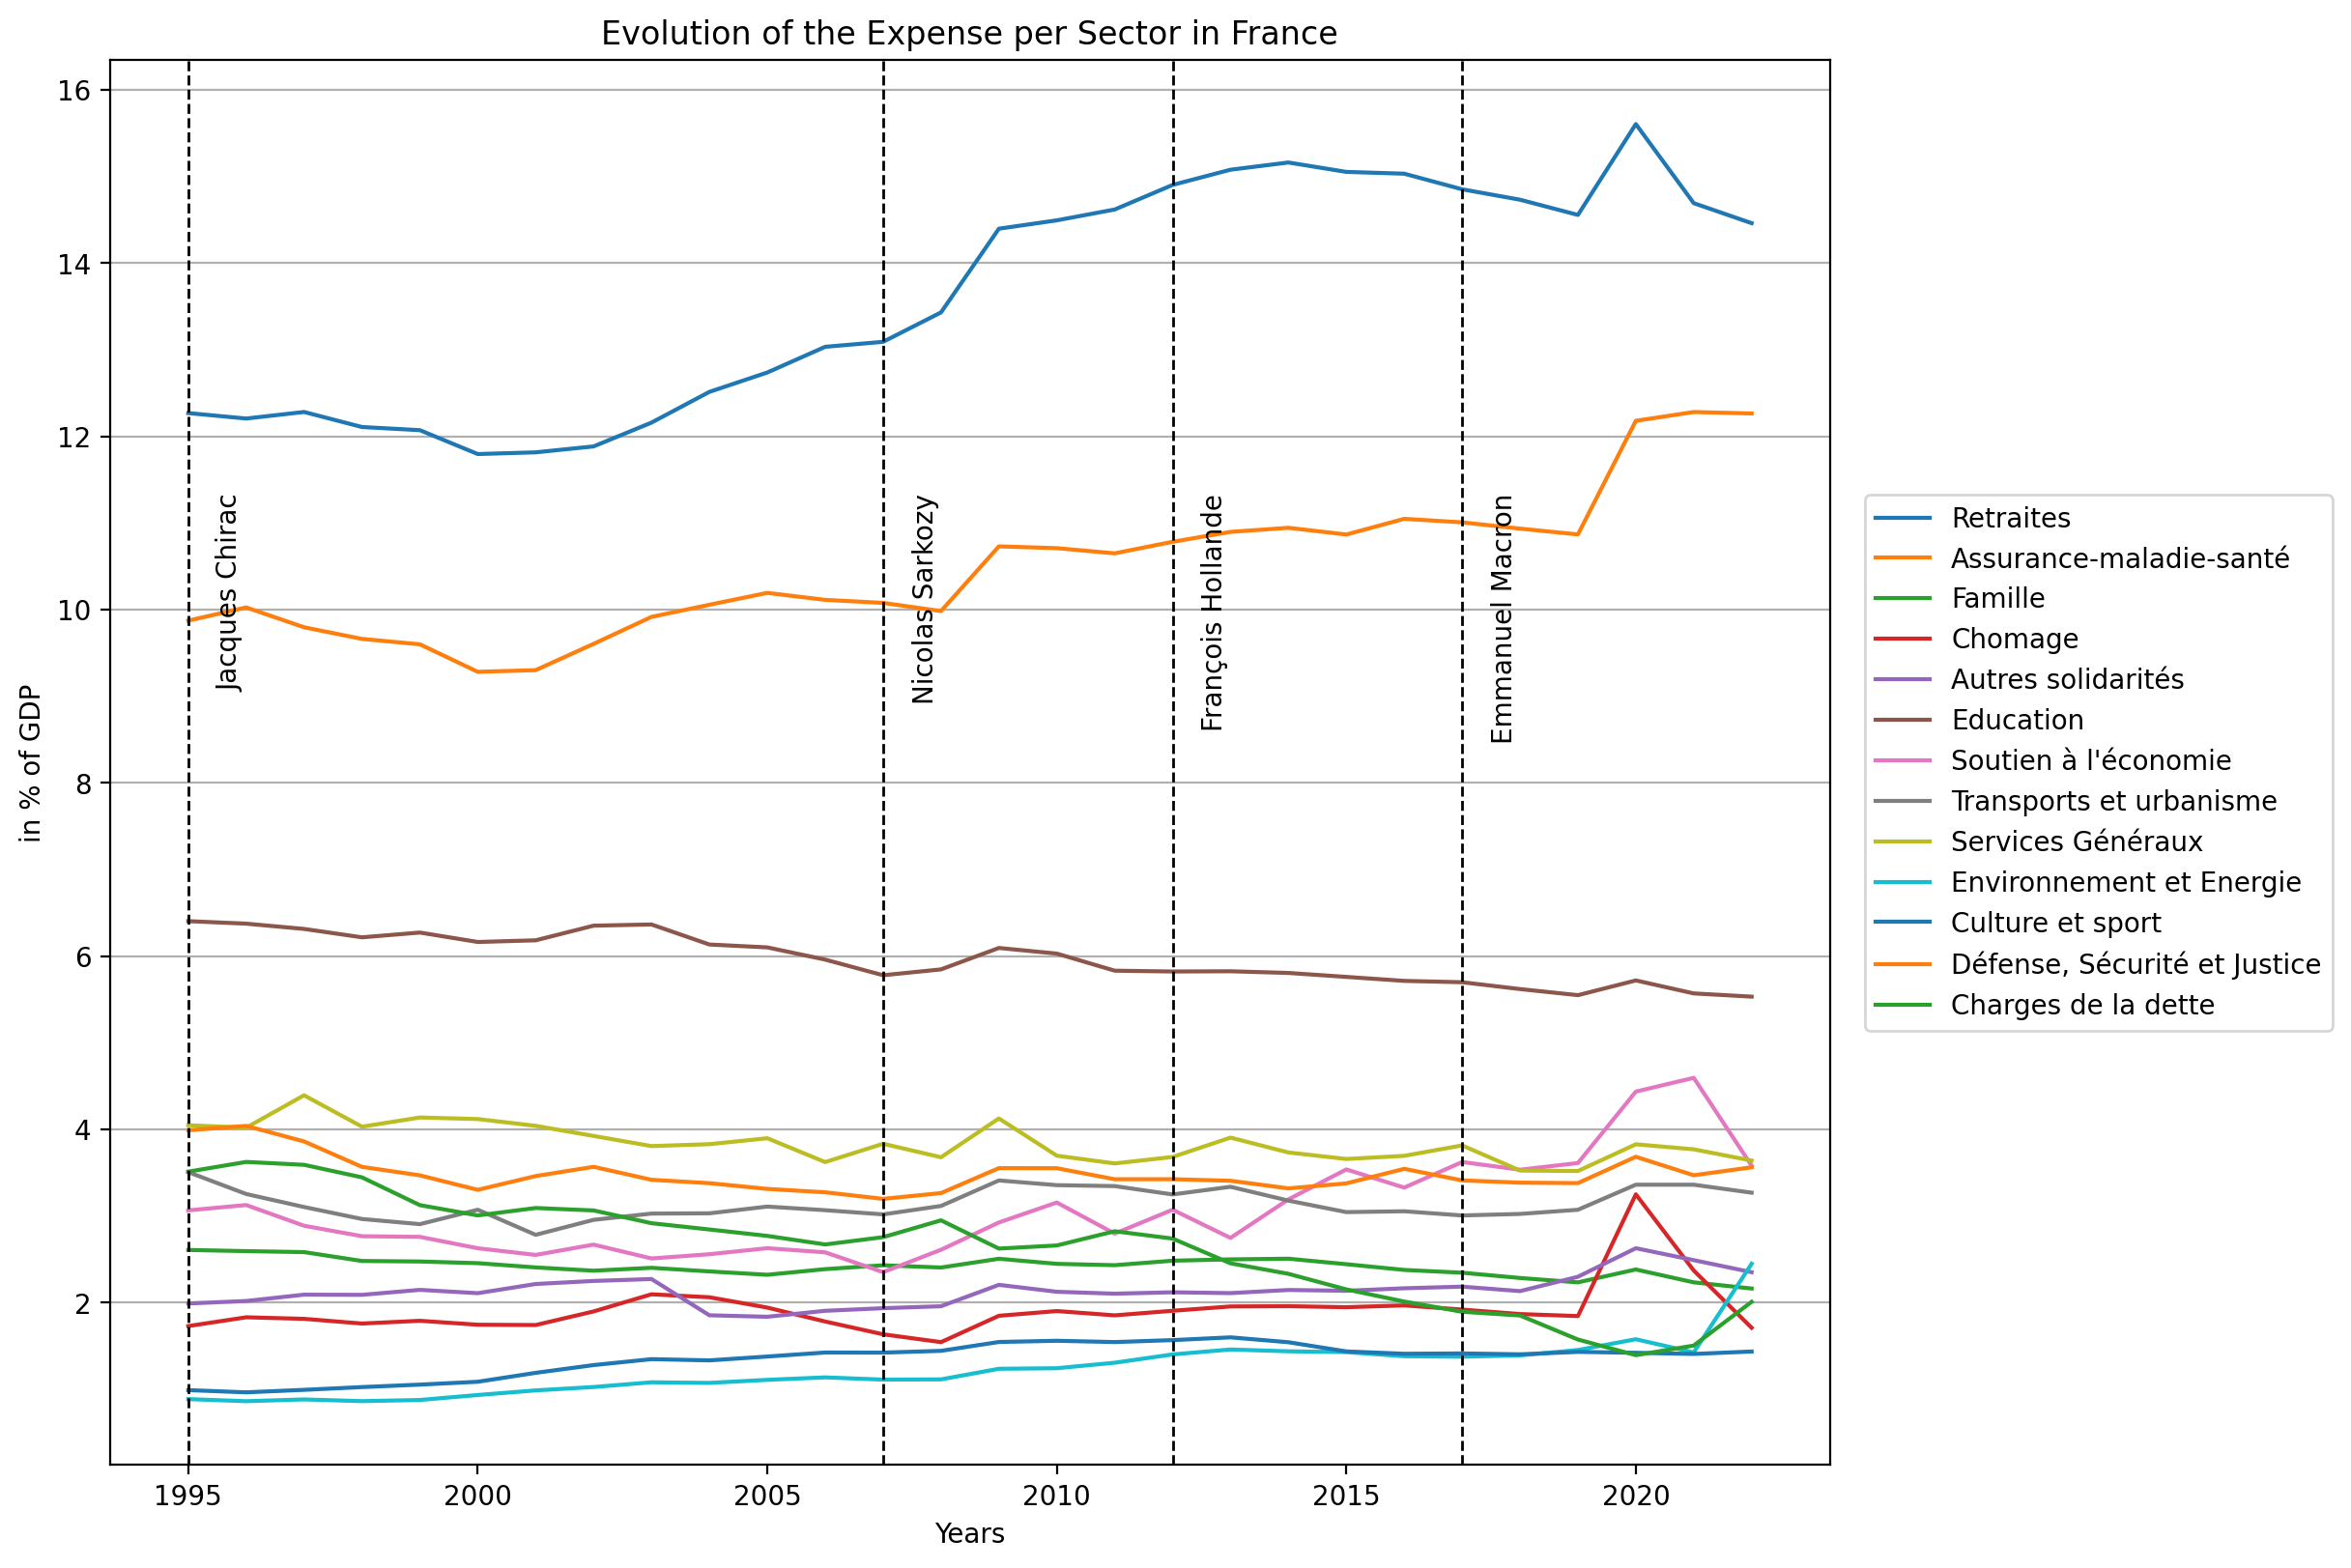

In [91]:
fig, ax = plt.subplots(layout='constrained')
ax.plot(df_sector['Annu'], df_sector[df_sector.columns.drop(['Annu', 'PIB'])], label=df_column[2:])

add_pres()
plt.xlabel('Years')
plt.ylabel("in % of GDP")
plt.title('Evolution of the Expense per Sector in France')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.grid(True, axis='y')
plt.show()

### Difference of expenses (as a % of GDP) for each president between the start of the term and its end (in %)

C:\Users\Ugo\AppData\Local\Temp\ipykernel_23040\552087548.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sectors, rotation=60)


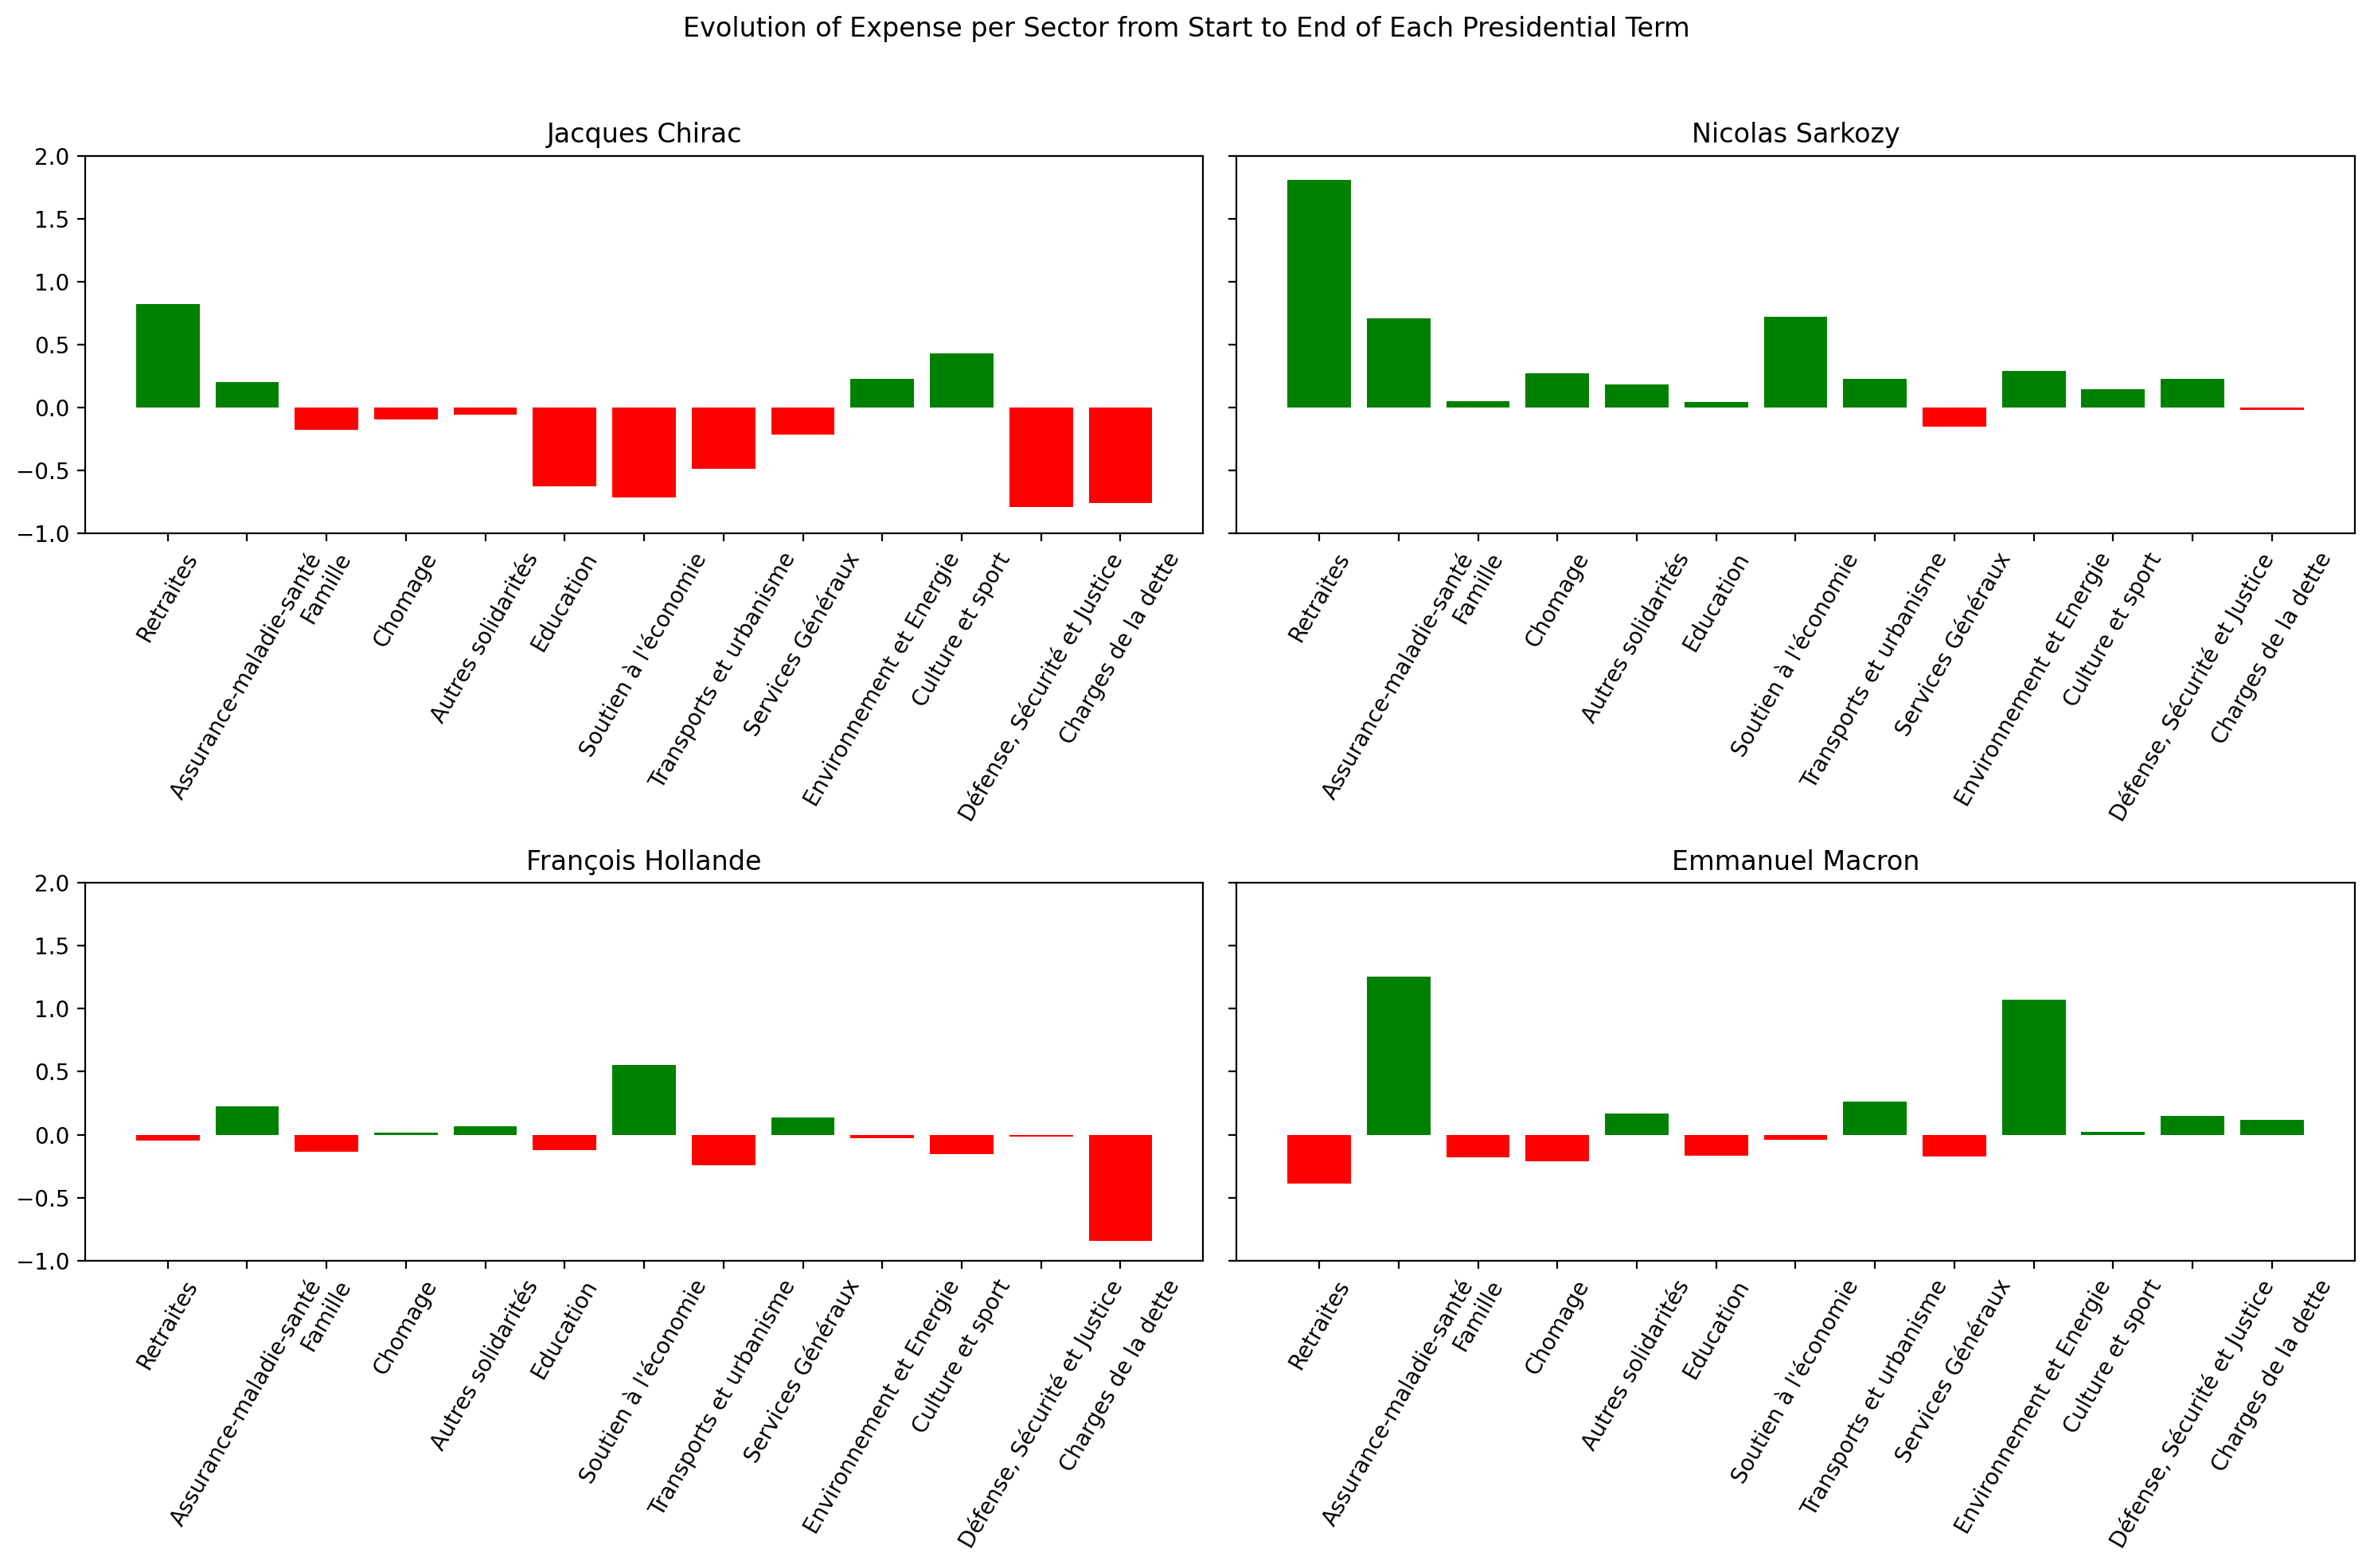

In [122]:
# Drop non-sector columns
sectors = df_sector.columns.drop(['Annu', 'PIB'])

# Mandates
president = {
    'Jacques Chirac': [1995, 2007],
    'Nicolas Sarkozy': [2007, 2012],
    'François Hollande': [2012, 2017],
    'Emmanuel Macron': [2017, 2022],}

# Calculate the difference in expenses from the start to the end of each term
president_diff = {}

for pres, (start, end) in president.items():
    start_data = df_sector[df_sector['Annu'] == start]
    end_data = df_sector[df_sector['Annu'] == end]
    
    if not start_data.empty and not end_data.empty:
        diff = end_data[sectors].values[0] - start_data[sectors].values[0]
        president_diff[pres] = diff

# Create the bar plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for ax, (president, diffs) in zip(axes.flatten(), president_diff.items()):
    colors = ['green' if value > 0 else 'red' for value in diffs]
    ax.bar(sectors, diffs, color=colors)
    ax.set_title(president)
    ax.set_xticklabels(sectors, rotation=60)

fig.suptitle('Evolution of Expense per Sector from Start to End of Each Presidential Term')
plt.tight_layout(rect=[0, 0, 1, 0.96])
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
plt.show()

# Focus on each social security

### Evolution of the expenses between 1995 and 2022, as a % of the GDP

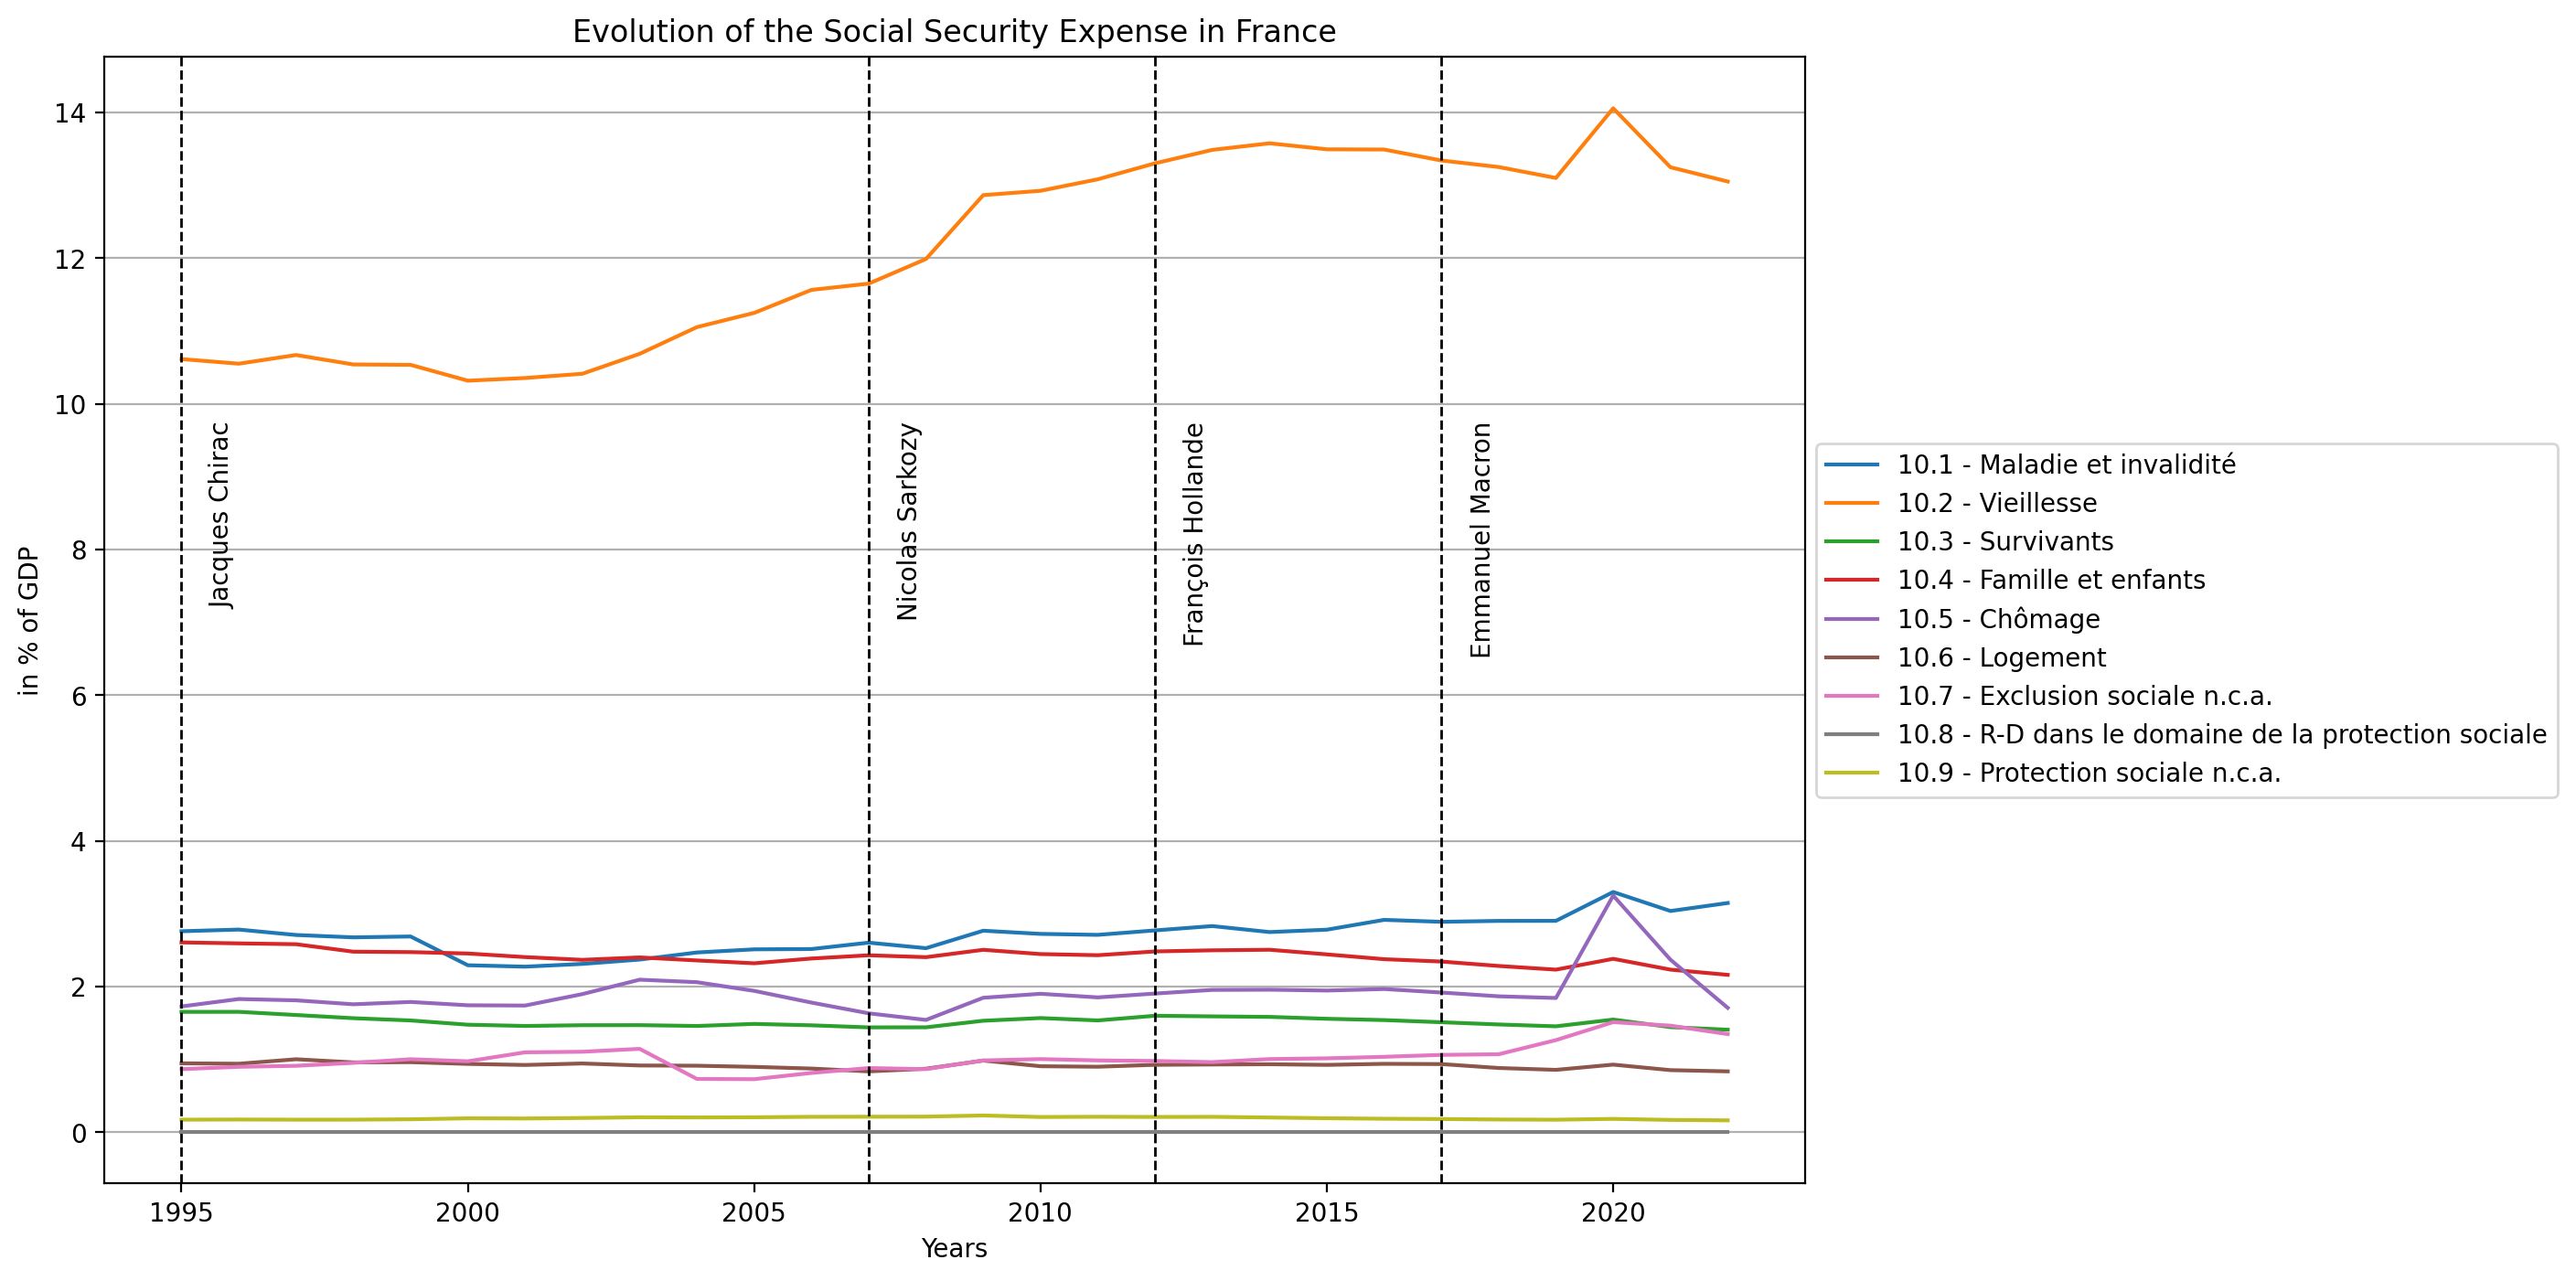

In [98]:
# Dataframe with all "global" budget
Secu_df = [col for col in df.columns if re.match(r'^10.\d{1}', col)]
Secu_df = pd.concat([df.iloc[:,0],df[Secu_df]], axis=1)

# Add GDP
Secu_df = Secu_df.merge(GDP, on='Annuel')

# Do expenses as a proportion of the GDP
Secu_df.iloc[:,1:10,] = Secu_df.iloc[:,1:10,].div(Secu_df.PIB, axis=0)*100

df_column = Secu_df[Secu_df.columns.drop(['Annuel', 'PIB'])].columns

# Plot 
fig, ax = plt.subplots()
ax.plot(df['Annuel'], Secu_df[Secu_df.columns.drop(['Annuel', 'PIB'])], label=df_column)

add_pres()
plt.xlabel('Years')
plt.ylabel("in % of GDP")
plt.title('Evolution of the Social Security Expense in France')
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))
plt.grid(True, axis='y')
plt.show()

### Difference of expenses (as a % of GDP) for each president between the start of the term and its end (in %)

C:\Users\Ugo\AppData\Local\Temp\ipykernel_23040\2460953559.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Secu, rotation=60)


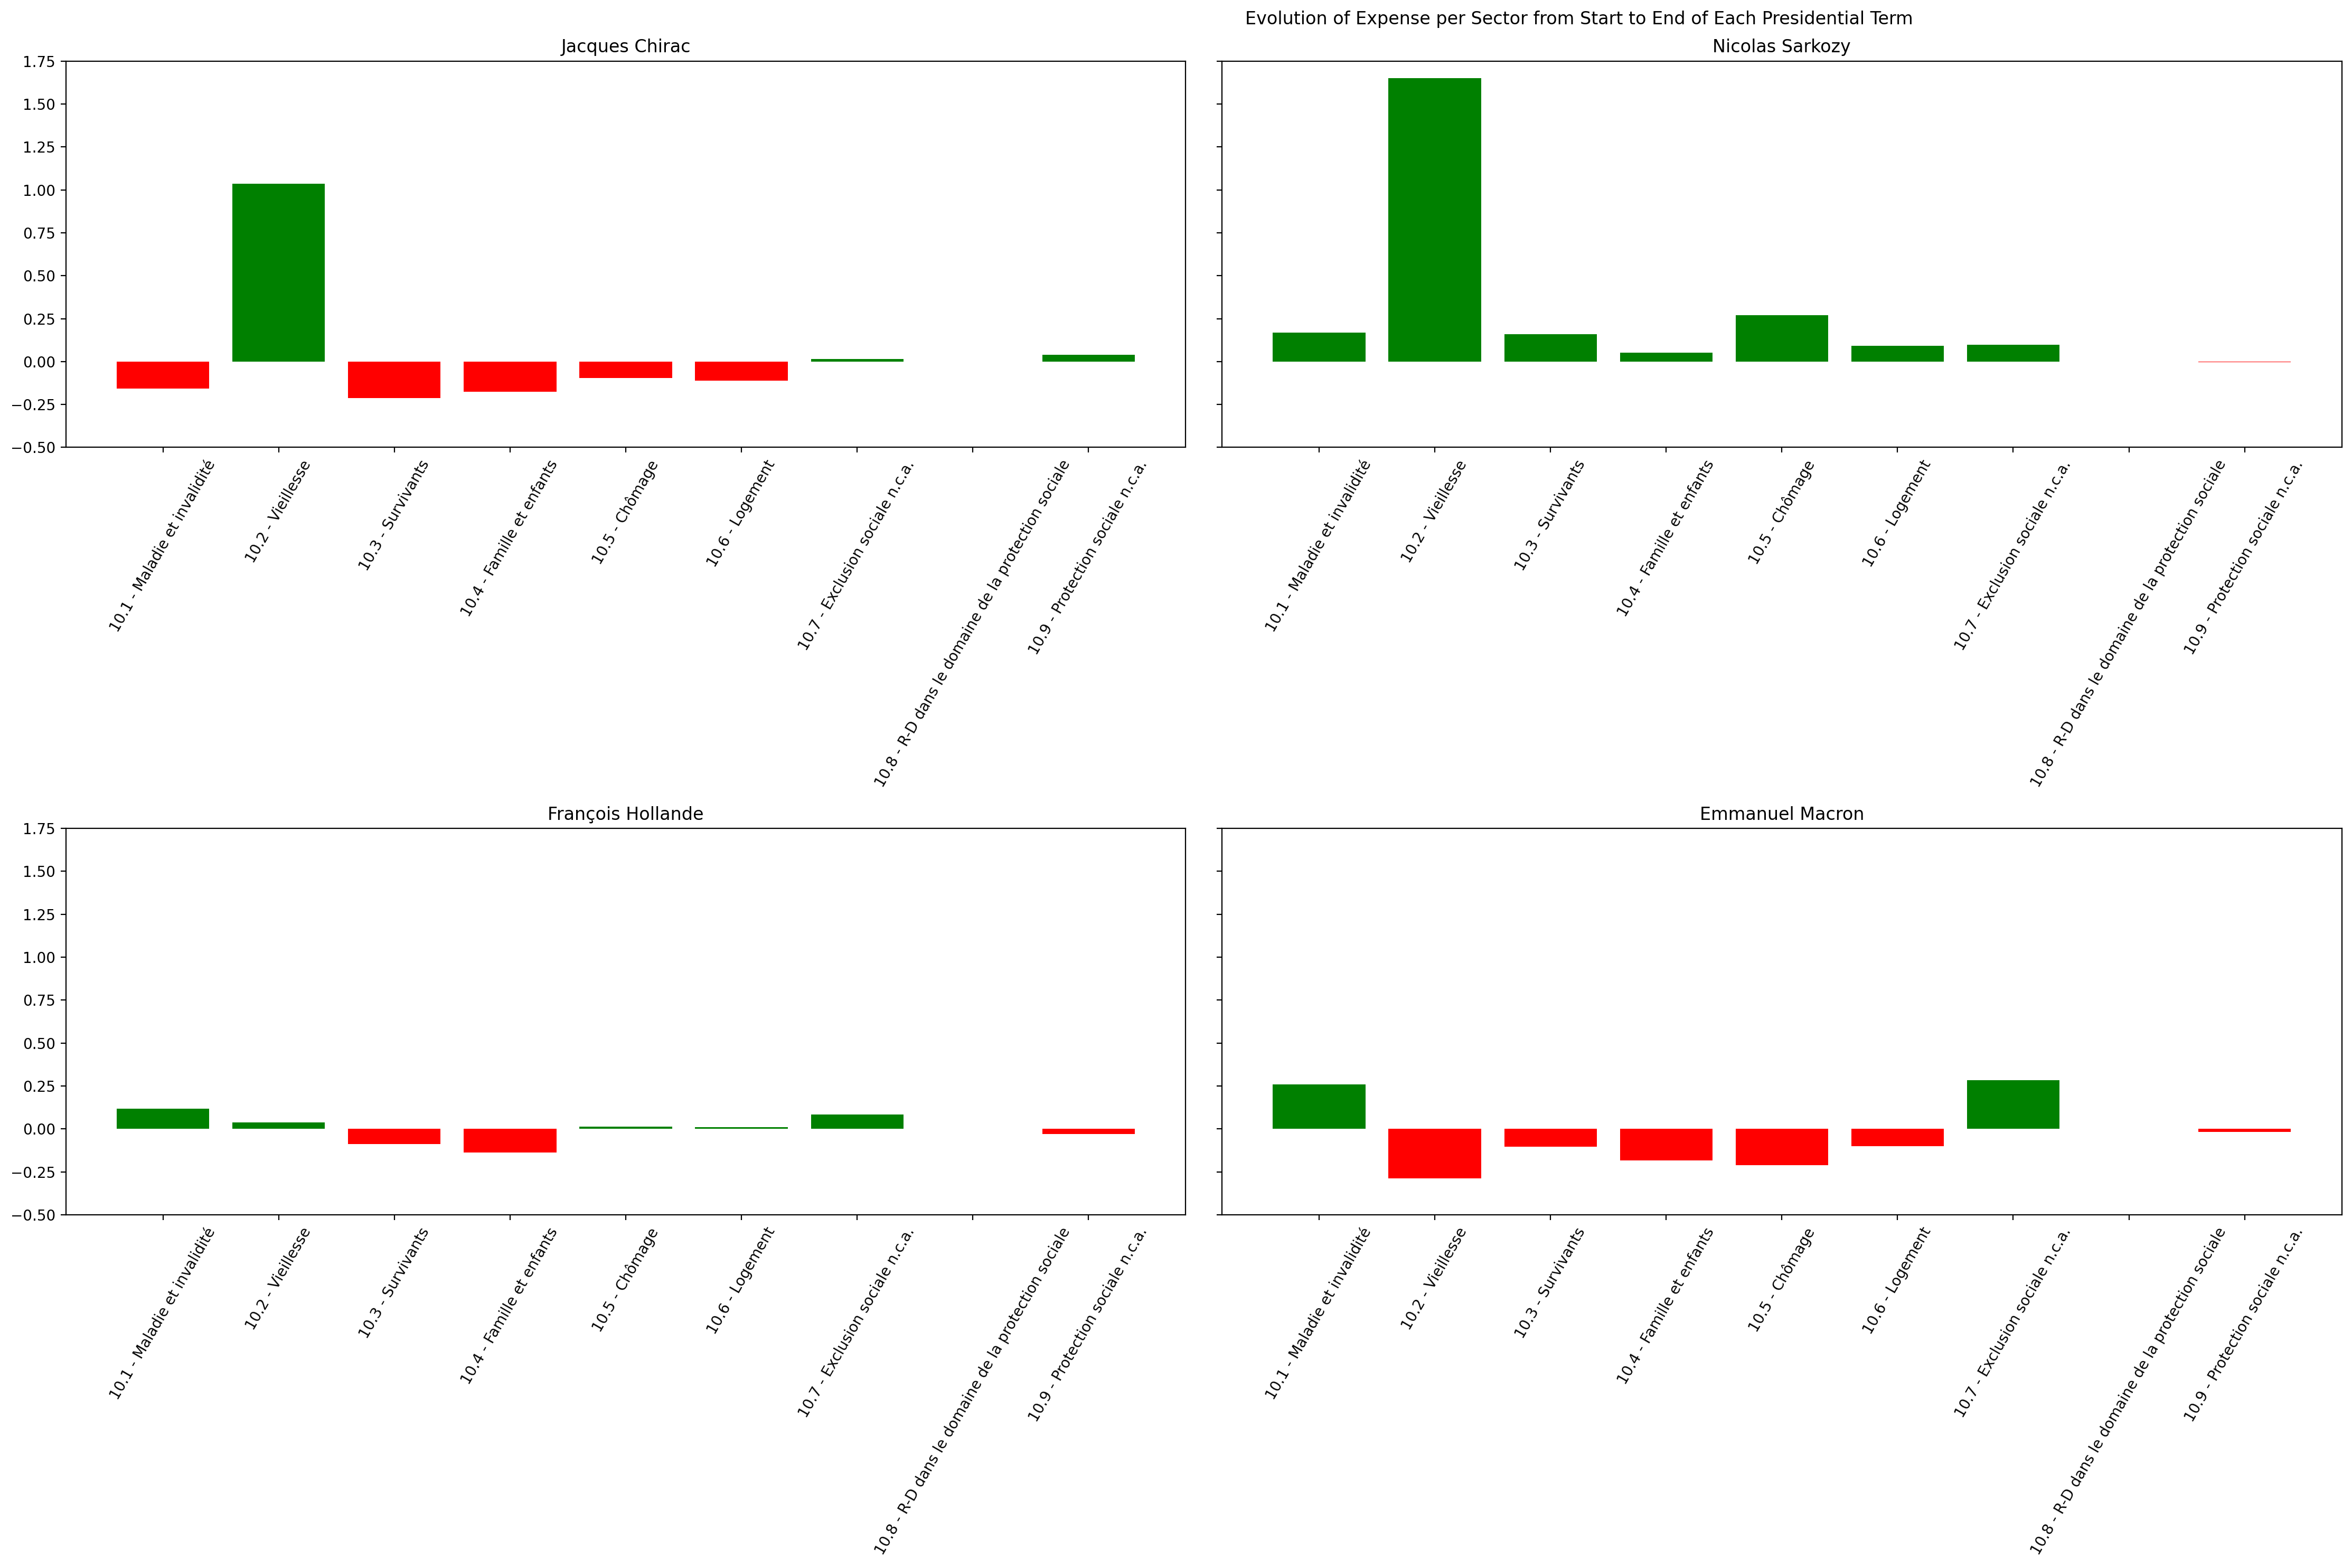

In [121]:
# Drop non-sector columns
Secu = Secu_df.columns.drop(['Annuel', 'PIB'])

# Mandates
president = {
    'Jacques Chirac': [1995, 2007],
    'Nicolas Sarkozy': [2007, 2012],
    'François Hollande': [2012, 2017],
    'Emmanuel Macron': [2017, 2022],}

# Calculate the difference in expenses from the start to the end of each term
president_diff = {}

for pres, (start, end) in president.items():
    start_data = Secu_df[Secu_df['Annuel'] == start]
    end_data = Secu_df[Secu_df['Annuel'] == end]
    
    if not start_data.empty and not end_data.empty:
        diff = end_data[Secu].values[0] - start_data[Secu].values[0]
        president_diff[pres] = diff

# Create the bar plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for ax, (president, diffs) in zip(axes.flatten(), president_diff.items()):
    colors = ['green' if value > 0 else 'red' for value in diffs]
    ax.bar(Secu, diffs, color=colors)
    ax.set_title(president)
    ax.set_xticklabels(Secu, rotation=60)

fig.suptitle('Evolution of Expense per Sector from Start to End of Each Presidential Term')
plt.tight_layout(rect=[-0.5, -0.5, 1, 1])
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
plt.show()